In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nngt
nngt.get_config()

{'backend': 'networkx',
 'mpi': False,
 'msd': 3889477588,
 'multithreading': True,
 'omp': 1,
 'seeds': None,
 'use_database': False,
 'version': '1.1.1',
 'with_nest': 'NEST 2.16.0',
 'with_plot': True}

In [3]:
#Create a graph with distance decaying connection probability (not the weight)
g = nngt.generation.distance_rule(scale=10,nodes=100,avg_deg=2)

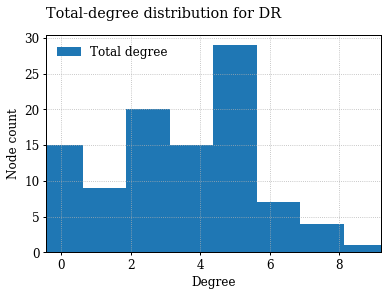

In [4]:
nngt.plot.degree_distribution(g)

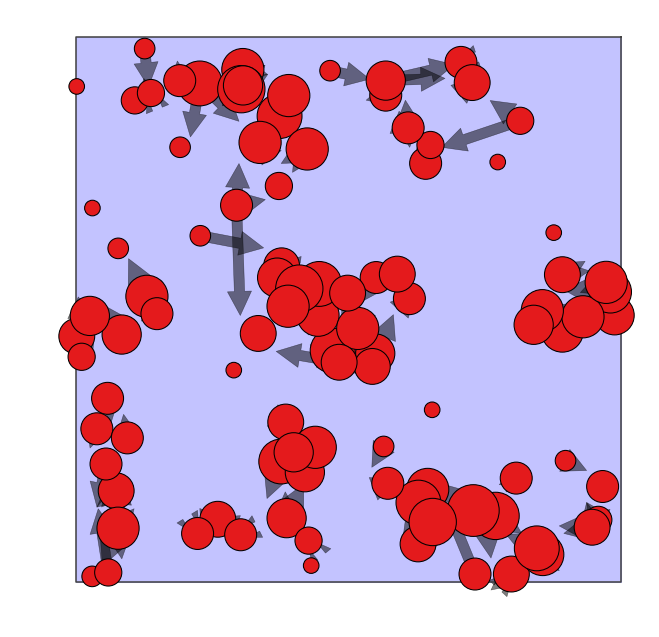

In [5]:
nngt.plot.draw_network(g)

In [6]:
g.edges_attributes

{'distance': array([26.55231857, 24.7451973 , 17.29717827, 26.21207619, 21.71474075,
         4.969491  , 16.72775459,  8.43185902, 18.16052055, 24.45985603,
        50.24700546, 26.04656219, 19.43897629, 19.703722  , 29.56274414,
         6.04921675, 37.42161942, 11.60993385, 27.75403214, 13.26752472,
        26.96806908, 25.62986183, 21.37889099, 24.73579979, 35.24772644,
        27.21647072, 32.08037186,  8.97154617, 23.77342415, 25.62986183,
        22.52420425, 15.04401302, 27.58323669, 11.40379524, 49.96344757,
        26.2754631 , 30.59656334, 32.14788437, 11.40379524, 14.53772545,
        19.1044693 , 20.95504189,  9.60448074, 40.93825531, 35.5892067 ,
        32.98714828, 21.2870369 , 19.00358391, 37.99062347, 21.46039963,
        26.55231857, 24.91159821, 12.25444317, 34.32214355, 16.01303482,
         9.60448074, 34.85181046, 30.41771698, 35.7902832 , 30.8374939 ,
        10.27427673,  2.39506221, 17.75616455, 27.75403214,  3.03236485,
        15.28079414,  9.18759727, 32.69

In [1]:
import sys
sys.path
#sys.path.append('/home/moshir/nest-simulator-2.16.0-build/lib/python3.5/site-packages/')
print(sys.path)

['', '/home/moshir/nest-simulator-2.16.0-build/lib/python3.5/site-packages', '/home/moshir/anaconda2/envs/py35/lib/python35.zip', '/home/moshir/anaconda2/envs/py35/lib/python3.5', '/home/moshir/anaconda2/envs/py35/lib/python3.5/plat-linux', '/home/moshir/anaconda2/envs/py35/lib/python3.5/lib-dynload', '/home/moshir/.local/lib/python3.5/site-packages', '/home/moshir/anaconda2/envs/py35/lib/python3.5/site-packages', '/home/moshir/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/extensions', '/home/moshir/.ipython']


In [2]:
import nest

In [5]:
neuron = nest.Create("iaf_psc_alpha")

In [6]:
nest.GetStatus(neuron)

({'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'I_e': 0.0,
  'V_m': -70.0,
  'V_min': -inf,
  'V_reset': -70.0,
  'V_th': -55.0,
  'archiver_length': 0,
  'beta_Ca': 0.001,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'global_id': 3,
  'local': True,
  'local_id': 3,
  'model': <SLILiteral: iaf_psc_alpha>,
  'node_uses_wfr': False,
  'parent': 0,
  'recordables': (<SLILiteral: I_syn_ex>,
   <SLILiteral: I_syn_in>,
   <SLILiteral: V_m>,
   <SLILiteral: weighted_spikes_ex>,
   <SLILiteral: weighted_spikes_in>),
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'vp': 0},)

In [10]:
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter,{"withtime":True, "record_from":["V_m"]})

In [6]:
nest.SetStatus(neuron, {"I_e": 376.})

In [7]:
spikedetector = nest.Create("spike_detector",params={"withgid":True, "withtime":True})

In [8]:
nest.Connect(multimeter,neuron)
nest.Connect(neuron, spikedetector)

In [9]:
nest.Simulate(1000.0)

In [10]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts  = dmm["events"]["times"]

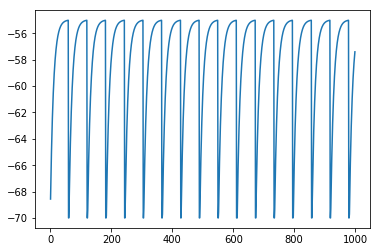

In [11]:
plt.plot(ts,Vms)

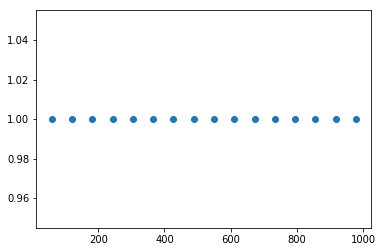

In [12]:
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts  = dSD["times"]
plt.plot(ts,evs,'o')

In [25]:
neuron2 = nest.Create("iaf_psc_alpha",params={"I_e": 370. })

In [26]:
nest.Connect(multimeter,neuron2)

In [41]:
nest.Simulate(1000.0)

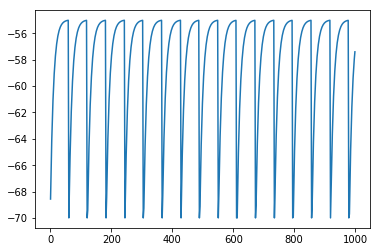

In [28]:
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
plt.plot(ts1,Vms1)

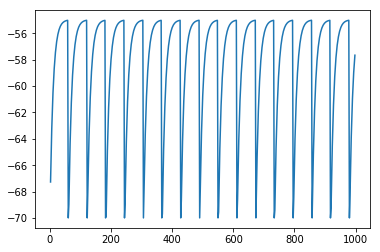

In [29]:
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
plt.plot(ts2, Vms2)

In [32]:
noise_ex = nest.Create("poisson_generator",params={"rate":80000.})
noise_in = nest.Create("poisson_generator",params={"rate":15000.})

In [33]:
nest.SetStatus(neuron,{"I_e": 0.})

In [40]:
spikedetector = nest.Create("spike_detector",params={"withgid":True, "withtime":True})
nest.Connect(neuron,spikedetector)

In [41]:
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)
nest.Connect(multimeter, neuron)

NESTError: IllegalConnection in Connect_g_g_D_D: Creation of connection is not possible because:
UniversalDataLogger::connect_logging_device(): Each multimeter can only be connected once to a given node.

In [49]:
nest.Simulate(1000.0)

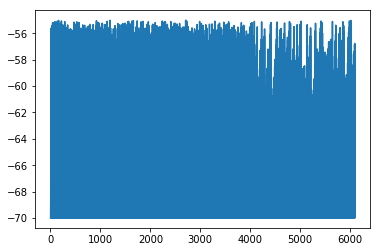

In [50]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts  = dmm["events"]["times"]
plt.plot(ts,Vms)

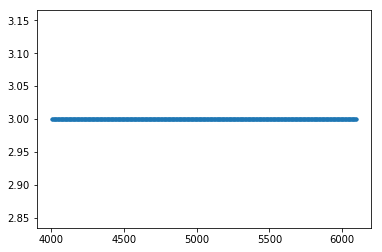

In [51]:
plt.figure()
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts  = dSD["times"]
plt.plot(ts,evs,'.')

In [40]:
neuron1 = nest.Create("iaf_psc_alpha",params={"I_e": 376.})
neuron2 = nest.Create("iaf_psc_alpha")
multimeter = nest.Create("multimeter",params={"withtime": True, "record_from": ["V_m"]})

In [47]:
nest.Connect(neuron1,neuron2, syn_spec={"weight":20.})
nest.Connect(multimeter,neuron2)

nest.Simulate(1000.0)

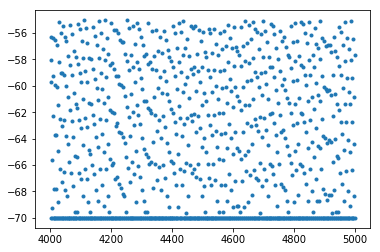

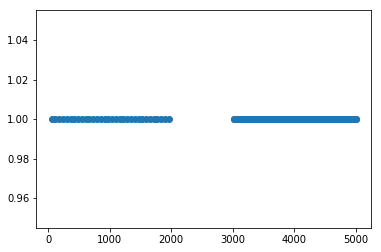

In [49]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"][::2]
ts  = dmm["events"]["times"][::2]
plt.plot(ts,Vms,'.')

plt.figure()
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts  = dSD["times"]
plt.plot(ts,evs,'o')